By J. Wuite, ENVEO IT GmbH, jan.wuite@enveo.at

![logo](https://climate.copernicus.eu/sites/default/files/2025-03/logoline_c3s.png)

# Access and visualisation of the Greenland Ice Sheet velocity data

**This notebook can be run on free online platforms, such as Binder, Kaggle and Colab, or they can be accessed from GitHub. The links to run this notebook in these environments are provided here, but please note they are not supported by ECMWF.**

[![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/c3s-training-submodule-sat-obs-hydro-cryo/develop?labpath=ice-sheet-velocity.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-hydro-cryo/blob/develop/ice-sheet-velocity.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/c3s-training-submodule-sat-obs-hydro-cryo/blob/develop/ice-sheet-velocity.ipynb)
[![github](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-hydro-cryo/blob/develop/ice-sheet-velocity.ipynb)

## Introduction

Mapping glacier flow velocity and its temporal changes provides key information for investigating the dynamic response of glaciers and ice sheets to changing boundary environmental conditions. Remote sensing techniques that utilise satellite data are the only feasible manner to derive accurate surface velocities of the remote Greenland glaciers on a regular basis. 

The Greenland Ice Sheet velocity dataset, available through the Copernicus Climate Change Service's (C3S) Climate Data Store (CDS), contains annual ice velocity maps of the Greenland Ice Sheet derived from Sentinel-1 SAR data. The data represent the current state-of-the-art in Europe for production of satellite-based ice velocity data records. It follows on from the ESA Greenland Ice Sheet Climate Change Initiative and is guided by the GCOS (Global Climate Observing System) targets for the Ice Sheets Essential Climate Variable.

More information on the dataset can be found here: https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-greenland-ice-sheet-velocity?tab=overview

## Learning Objectives 🎯

This tutorial will demonstrate how to plot velocity maps and flow vectors of the Greenland Ice Sheet and its major outlet glaciers, using ice velocity data from the Copernicus Climate Change Service (C3S). It will show you how to download data from the C3S Climate Data Store (CDS), plot the maps and display flow vectors on top.

## Prepare your environment

The first thing we need to do, is make sure you are ready to run the code while working through this notebook. There are some simple steps you need to do to get yourself set up.


### Set up CDSAPI and your credentials

The code below will ensure that the `cdsapi` package is installed. If you have not setup your `~/.cdsapirc` file with your credentials, you can replace `None` with your credentials that can be found on the [how to api](https://cds.climate.copernicus.eu/how-to-api) page (you will need to log in to see your credentials).

In [2]:
!pip install -q cdsapi
# If you have already setup your .cdsapirc file you can leave this as None
cdsapi_key = None
cdsapi_url = None

### (Install and) Import libraries

The data are stored in netCDF4 files. To work with them, several libraries are needed. These are used to retrieve the data, unpack it, run calculations and plot the results.

In [3]:
# CDS API
import cdsapi

# File handling
import shutil
import glob
import os

# Calculations
import numpy as np
import xarray as xr

# Mapping
import cartopy.crs as ccrs

# Plotting
import matplotlib.pyplot as plt

## Explore data

Select the ice sheet of interest (either Greenland or Antarctica) and retrieve the dataset. Ice velocity maps are extended on an annual basis. In this example, we extract the annually averaged map for the 2020-2021 glaciological year (running from Oct 1st, 2020 - Sept 30th, 2021). An example of how to retrieve the data is given on the CDS, under 'Show API request' on the dataset's webpage at:
https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-greenland-ice-sheet-velocity?tab=form

### Search for the data

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These parameters can all be selected in the "Download data" tab. In this tab a form appears in which we can select the following parameters to download:

:::{dropdown} Parameters of data to download

- Variable: `All`
- Domain: `Greenland ice sheet`
- Period: `2020-2021`
- Version: `1.4`

:::


At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below). Having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory.

:::{warning}

Please remember to accept the terms and conditions of the dataset, at the bottom of the CDS download form!

:::

### Download the data

With the API request copied into the cells below, running these cells will retrieve and download the data you requested into your local directory.

The dataset comes in a zip file, and may takesome time to load (>650 Mb). 

In [3]:
c = cdsapi.Client()
c.retrieve(
    "satellite-greenland-ice-sheet-velocity",
    {
        'variable': 'all',
        'domain': ['greenland_ice_sheet'],
        'period': '2020_2021',
        'version': ['1_4'],
    },
    'download.zip')

# Unpack the zip file and remove the zipped data

shutil.unpack_archive('download.zip', '.')
os.remove('download.zip')

# List the files contained and select the latest netCDF (.nc) file. Print its filename

list_of_files = glob.glob('*.nc') # * means all if need specific format then *.nc
latest_file = max(list_of_files, key=os.path.getctime)
print('In the following you are seeing the data from: \n'+latest_file)

2025-09-16 12:56:15,569 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-16 12:56:15,570 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-16 12:56:15,808 INFO Request ID is 505d04a4-7e84-402d-ae7d-ce83530ce9c1
2025-09-16 12:56:15,927 INFO status has been updated to accepted
2025-09-16 12:56:29,696 INFO status has been updated to running
2025-09-16 12:56:37,390 INFO status has been updated to successful


ddea8e96c0682ecbede0e94296883099.zip:   0%|          | 0.00/663M [00:00<?, ?B/s]

In the following you are seeing the data from: 
C3S_GrIS_IV_250m_S1_20201001_20210930_v1_4.nc


### Inspect data

Open the data file and list its contents. These include descriptive comments. 

Data description: Ice velocity is provided at 250m and 500m grid spacing in North Polar Stereographic projection (depending on version). The horizontal velocity components are provided in true meters per day, towards the easting and northing directions of the grid. The vertical displacement is derived from a digital elevation model. Provided is a NetCDF file with the velocity components: vx, vy, vz, along with maps showing the magnitude of the horizontal components, the valid pixel count and uncertainty (based on the standard deviation). The product combines all ice velocity maps, based on 6- and 12-day repeats, acquired over a full year in an annually averaged product running from October 1st to September 30th, mimicking a glaciological year. The dataset is extended on an annual basis.

In [5]:
# Open the NetCDF file

ds = xr.open_dataset(latest_file)

# Print contents list

print('The data file contains the following:')
print(ds)


The data file contains the following:
<xarray.Dataset> Size: 2GB
Dimensions:                              (y: 10801, x: 5984)
Coordinates:
  * y                                    (y) float64 86kB -6.556e+05 ... -3.3...
  * x                                    (x) float64 48kB -6.399e+05 ... 8.55...
Data variables:
    crs                                  int32 4B ...
    land_ice_surface_easting_velocity    (y, x) float32 259MB ...
    land_ice_surface_northing_velocity   (y, x) float32 259MB ...
    land_ice_surface_vertical_velocity   (y, x) float32 259MB ...
    land_ice_surface_velocity_magnitude  (y, x) float32 259MB ...
    land_ice_surface_measurement_count   (y, x) float64 517MB ...
    land_ice_surface_easting_stddev      (y, x) float32 259MB ...
    land_ice_surface_northing_stddev     (y, x) float32 259MB ...
Attributes: (12/13)
    Conventions:    CF-1.7
    title:          Ice Velocity of the Greenland Ice Sheet
    reference:      Main: Nagler, T.; Rott, H.; Hetzenecker,

## Plot the Greenland Ice Sheet velocity map and display flowvectors on top

The following section plots the ice velocity map colour coded in a figure in Polar Stereographic projection with a nice background. In addition, it extracts the vx and vy components of the velocity from the dataset which are used to display velocity directions on top of the velocity map. In this way the figure does not only show the magnitude of the ice velocity but also the direction of ice flow.


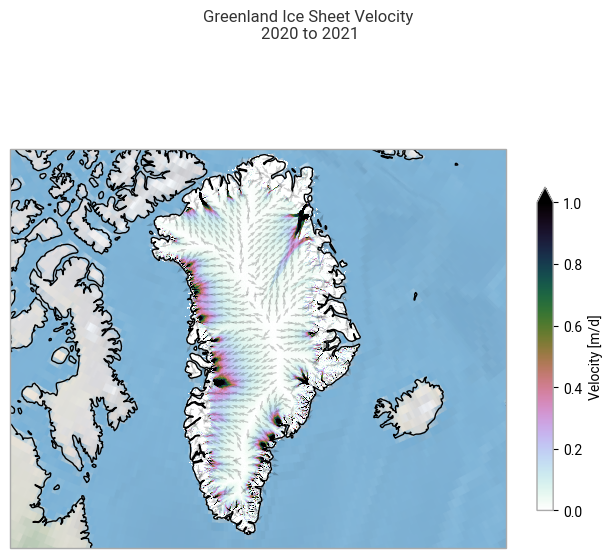

In [6]:
# Plot the ice velocity map in a figure in Polar Stereographic projection with a nice background, color map and vectors on top

#For Greenland:

projection = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70) #EPSG:3413
ext = [-73, -12, 59, 83]    # map boundaries, in degrees, [east, west, south, north]
    
# Create a new figure

fig = plt.figure()
title='Greenland Ice Sheet Velocity \n'+'2020 to 2021'
fig.suptitle(title, fontsize=12)

# Add a new subplot to the figure with the projection defined above


ax = plt.axes(projection=projection)

# Set the extent of the map to the longitude and latitude range defined above

ax.set_extent(ext, crs=ccrs.PlateCarree())

# Add a background image and coastlines to the map
ax.stock_img()
ax.coastlines(resolution='50m')

# Plot the velocity magnitude data on the map. Customise the plot settings.

vmin=0        # Values below this value will be set to the bottom of the colour range
vmax=1          # Values above this value will be set to the top of the colour range
cmap='cubehelix_r'      # Reversed cubehelix colortable 

ds.land_ice_surface_velocity_magnitude.plot(vmin=vmin, vmax=vmax, cmap=cmap,cbar_kwargs={'label': "Velocity [m/d]",'shrink': 0.6})

# Extract the easting and northing velocity and display a selection on top as flow vectors

u=ds.land_ice_surface_easting_velocity.values
v=ds.land_ice_surface_northing_velocity.values
y=ds.coords['y'].values
x=ds.coords['x'].values

X=[]
Y=[]
U=[]
V=[]

for yi in range(0, u.shape[0], 200):
  for xi in range(0, u.shape[1], 200):
    X.append(x[xi])
    Y.append(y[yi])
    # Normalize to display all vectors at same length:
    U1=u[yi][xi]
    V1=v[yi][xi]
    U.append(U1 / np.sqrt(U1**2 + V1**2)) 
    V.append(V1 / np.sqrt(U1**2 + V1**2))
    scale=50
    # For proportionate vector length comment the above section and uncomment the following instead:
    #U.append(u[yi][xi])
    #V.append(v[yi][xi])
    #scale=5
plt.quiver(X,Y,U,V,scale=scale,alpha=0.2,color="black")

# Display the plot

plt.show()

## Zoom into key outlet glaciers of the Greenland Ice Sheet

The following zooms into some of the biggest outlet glaciers of the Greenland Ice Sheet and plots the ice velocity in subplots using a different colour code.



<Figure size 800x700 with 0 Axes>

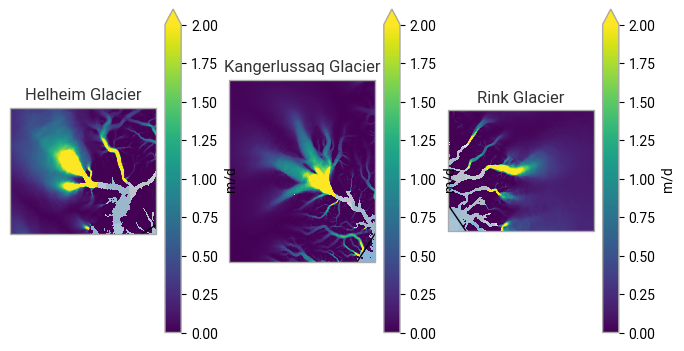

In [6]:

projection = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70) #EPSG:3413

extents = {
    #'Hagen Glacier': [-33, -27, 81, 81.6],
    'Helheim Glacier': [-40, -37, 66, 67],
    #'Illullip Sermia': [-56.5, -55, 74.2, 74.6],
    #'Jakobshavn Isbræ': [-51, -46, 68.5, 70.5],
    'Kangerlussaq Glacier': [-36, -32, 68, 70],
    #'Petermann Glacier': [-62, -55, 80, 81.5],
    'Rink Glacier': [-53, -47, 71, 72.5],
    #'Ryder Glacier': [-53, -47, 80.5, 82],
    #'Zachariae Isstrom': [-30, -20, 78, 80]
} # map boundaries for ke glaciers, in degrees, [east, west, south, north]

title='Greenland Ice Sheet Velocity 2020-2021'
fig = plt.figure()
fig.suptitle(title, fontsize=12)
fig, axs = plt.subplots(nrows=1, ncols=3, subplot_kw={'projection': projection})
axs = axs.flatten()

i=0
for x in extents:
  axs[i].set_extent(extents[x], crs=ccrs.PlateCarree())
  axs[i].stock_img()
  axs[i].coastlines(resolution='110m')
  ds.land_ice_surface_velocity_magnitude.plot(ax=axs[i],vmin=0, vmax=2, cmap='viridis', cbar_kwargs={'label': "m/d",'shrink': 0.6})
  axs[i].set_title(x)    
  i+=1

plt.show()


## Take home messages 📌


- Ice velocity is an important parameter for determining the mass discharge of ice sheet and glaciers and used to estimate the current contribution to sea-level rise and 
freshwater flux into the oceans.
- Ice velocity data is also used in ice sheet models, that inform about physical processes causing changes and help predict the contribution to future sea level rise in response to climate change.
- Repeated ice velocity mapping can be used to detect gradual or abrupt changes in ice flow which might indicate a dynamical imbalance.
- This notebook enables you to download, extract, visualise and explore the Greenland Ice Sheet annual gridded velocity data available through the C3S Climate Data Store.

